# Numpy Advanced Stuffs

In [1]:
import numpy as np

## Speed comparision of Numpy Array and Python Lists

In [2]:
# Speed 
# List
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time 

start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time() - start)

4.278988599777222


In [4]:
# numpy 
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a+b 
print(time.time() - start)

0.01565861701965332


In [5]:
# How many times faster ?
4.278988599777222 / 0.01565861701965332

273.2673386421426

### reason for faster output - numpy arrays use CTYPE Arrays whose sizes are fixed and they do not use referential arrays it means you directly put the data into the memory block and do not put their memory address.

In [6]:
# Fayda in terms of MEMORY
a = [ i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [7]:
a = np.arange(10000000)

sys.getsizeof(a)

40000112

In [8]:
# difference in size of memory blocks
89095160 / 40000112

2.2273727633562626

# Advanced Indexing

In [13]:
# Normal indexing and slicing 

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [15]:
a[1,2]

6

In [11]:
a[1:3,1:3]

array([[4, 5],
       [7, 8]])

## Fancy Indexing and Boolean Indexing



In [16]:
a 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [17]:
# now i need to print 1st ,second, third , last row

a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [18]:
a[:,[0,2,3]] # printing all elements of columns 0,2,3

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [20]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[33, 98, 59, 79],
       [41, 78, 60, 34],
       [23, 59, 15, 69],
       [97,  7, 57, 70],
       [52, 80, 66, 33],
       [84, 87, 81, 58]])

In [21]:
# find all numbers greater than 50
a > 50

array([[False,  True,  True,  True],
       [False,  True,  True, False],
       [False,  True, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

In [22]:
a[a>50] # boolean masking

array([98, 59, 79, 78, 60, 59, 69, 97, 57, 70, 52, 80, 66, 84, 87, 81, 58])

In [23]:
# Find out even numbers
 
a % 2 ==  0

array([[False,  True, False, False],
       [False,  True,  True,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True, False],
       [ True, False, False,  True]])

In [24]:
a[a % 2 ==  0]

array([98, 78, 60, 34, 70, 52, 80, 66, 84, 58])

In [26]:
# Find all numbers greater than 50 and are even
( a > 50 ) & ( a % 2 == 0)

array([[False,  True, False, False],
       [False,  True,  True, False],
       [False, False, False, False],
       [False, False, False,  True],
       [ True,  True,  True, False],
       [ True, False, False,  True]])

In [27]:
a[( a > 50 ) & ( a % 2 == 0)]

array([98, 78, 60, 70, 52, 80, 66, 84, 58])

In [28]:
# Find all numbers which are not divisible by zero

a % 7 != 0

array([[ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True, False],
       [ True,  True,  True,  True],
       [False,  True,  True,  True]])

In [29]:
a[a % 7 != 0]

array([33, 59, 79, 41, 78, 60, 34, 23, 59, 15, 69, 97, 57, 52, 80, 66, 33,
       87, 81, 58])

# Broadcasting

> The term broadcasting describes how Numpy treats arrays with different shapes during arithmetic operations.\
The smalller array is " broadcast " across the larger array so that they have compatible shapes

In [30]:
# same shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [31]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [32]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [33]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [34]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [35]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [36]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [37]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [38]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [39]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [40]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [41]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [42]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

488.72

In [43]:
# binary cross entropy
np.mean((actual - predicted)**2)

488.72

In [44]:
actual

array([29, 49, 42, 49, 14, 10, 42, 14,  7, 48,  1, 10, 43, 49, 45, 47,  3,
       29, 45, 48, 17,  1, 19, 32, 42])

### Working with missing values

In [45]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [46]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

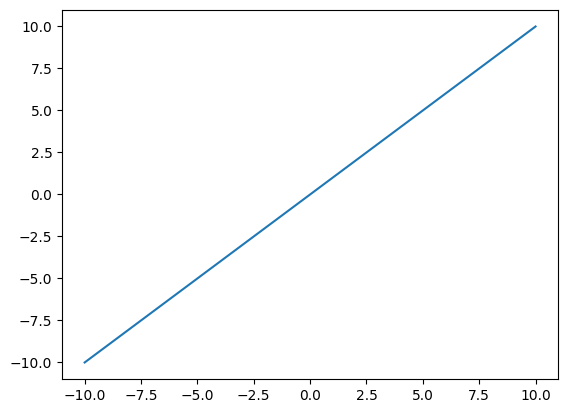

In [47]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

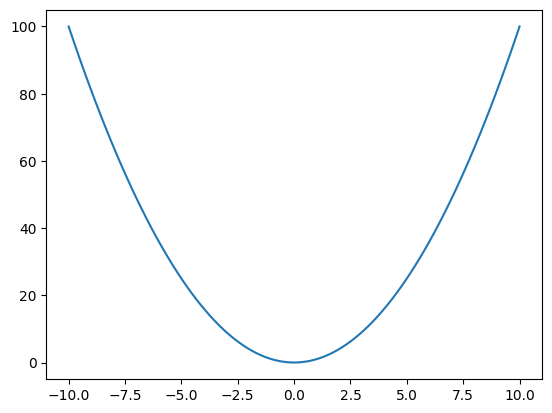

In [48]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

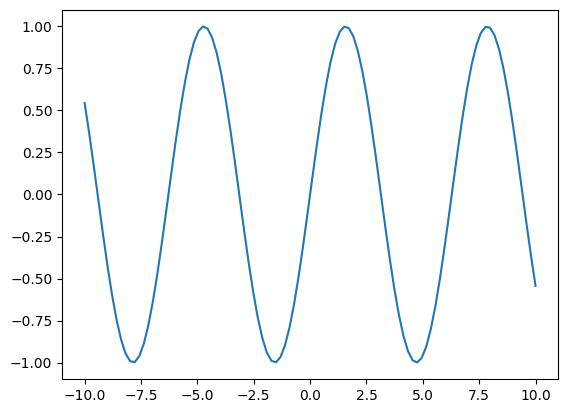

In [49]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_12360\1132300831.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


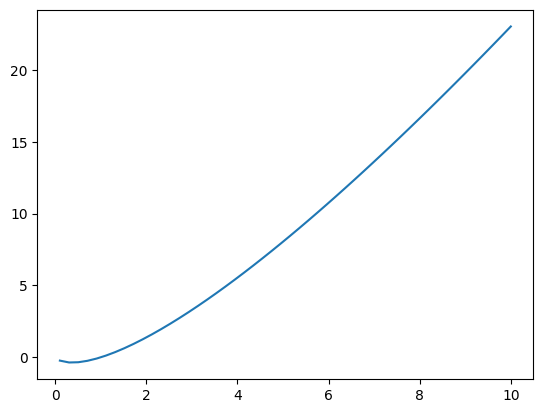

In [50]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)